### Data Exploration

The dataset of Cyrillic handwriting is composed of 73830 segments of handwriting texts (crops) in Russian

Train - test split: 95% - 5%

Training / testing images are stored in folders, labels are stored in .tsv files

In [1]:
from collections import Counter
from tqdm import tqdm # for progress bar
import random
import matplotlib.pyplot as plt # for plotting
import cv2
from typing import List, Dict, Tuple # for function typing
import numpy as np

In [2]:
def process_data(image_dir: str,
                 labels_dir: str,
                 ignore: List[str]):
    """ 
    Arguments: image_dir: path to directory with image
               labels_dir: path to tsv file with labels
               ignore: a list of strings to ignore when processing labels
    Returns: image_to_label: dict, keys are the paths of images, values are corresponding labels
             unique_chars: all unique chars used in the labels
             all_labels: list, a list of all labels
    """
    # Setup parameters
    image_to_label = dict()
    unique_chars = []

    # Read the entire tsv file into a string
    raw_file = open(labels_dir, 'r', encoding = 'utf-8').read()
    # Split the above string into a list of lines
    splitted_file = raw_file.split("\n") 

    # See what raw_file and splitted_file look like
    # print(f"first 100 characters in raw file:\n {raw_file[:100]}")
    # print("-------------------------------")
    # print(f"first 10 elements in splitted tsv file: \n {splitted_file[:10]}")

    for line in splitted_file:
        # after \t splitting, x[0]: image name, x[1]: word in image
        try:
            x = line.split("\t")
            flag = False
            for ignore_item in ignore:
                if ignore_item in x[1]:
                    flag = True
            if flag == False:
                image_to_label[image_dir + x[0]] = x[1]
                # append unique character to unique_chars[]
                for char in x[1]:
                    if char not in unique_chars:
                        unique_chars.append(char)
        except:
            print(f"{line} cannot be splitted, error!")
            pass
    # Getting all labels from image_to_label dictionary, store into a list
    all_labels = list(image_to_label.values())
    
    # print("\nBelow is return statement: --------------------------------")
    # return dict(list(image_to_label.items())[:10]), unique_chars, all_labels[:10]
    return image_to_label, unique_chars, all_labels

In [92]:
process_data(image_dir = "/Users/xinyaoyin/Desktop/train/",
             labels_dir = "/Users/xinyaoyin/Desktop/train.tsv",
             ignore = [])

first 100 characters in raw file:
 aa1.png	Молдова
aa1007.png	продолжила борьбу
aa101.png	разработанные
aa1012.png	Плачи
aa1013.png	Гим
-------------------------------
first 10 elements in splitted tsv file: 
 ['aa1.png\tМолдова', 'aa1007.png\tпродолжила борьбу', 'aa101.png\tразработанные', 'aa1012.png\tПлачи', 'aa1013.png\tГимны богам', 'aa1017.png\t(вспомнить', 'aa1018.png\tмиф', 'aa1019.png\tсозда-', 'aa102.png\tДаже работа', 'aa1021.png\tлюдей).']

Below is return statement: --------------------------------


({'/Users/xinyaoyin/Desktop/trainaa1.png': 'Молдова',
  '/Users/xinyaoyin/Desktop/trainaa1007.png': 'продолжила борьбу',
  '/Users/xinyaoyin/Desktop/trainaa101.png': 'разработанные',
  '/Users/xinyaoyin/Desktop/trainaa1012.png': 'Плачи',
  '/Users/xinyaoyin/Desktop/trainaa1013.png': 'Гимны богам',
  '/Users/xinyaoyin/Desktop/trainaa1017.png': '(вспомнить',
  '/Users/xinyaoyin/Desktop/trainaa1018.png': 'миф',
  '/Users/xinyaoyin/Desktop/trainaa1019.png': 'созда-',
  '/Users/xinyaoyin/Desktop/trainaa102.png': 'Даже работа',
  '/Users/xinyaoyin/Desktop/trainaa1021.png': 'людей).'},
 ['М',
  'о',
  'л',
  'д',
  'в',
  'а',
  'п',
  'р',
  'ж',
  'и',
  ' ',
  'б',
  'ь',
  'у',
  'з',
  'т',
  'н',
  'ы',
  'е',
  'П',
  'ч',
  'Г',
  'м',
  'г',
  '(',
  'с',
  'ф',
  '-',
  'Д',
  'ю',
  'й',
  ')',
  '.',
  'У',
  'к',
  'ъ',
  'В',
  'Р',
  'я',
  'А',
  'щ',
  'х',
  ',',
  'Б',
  'Л',
  'Е',
  'И',
  'ё',
  'э',
  'ц',
  'Т',
  '3',
  '1',
  '7',
  '5',
  '0',
  'ш',
  'Э',
  'С',
 

In [3]:
raw_file_train = open("/Users/xinyaoyin/Desktop/train.tsv", 'r', encoding = 'utf-8').read()
splitted_file_train = raw_file_train.split("\n") 
print(f"There are {len(splitted_file_train)} of training data")

raw_file_test = open("/Users/xinyaoyin/Desktop/test.tsv", 'r', encoding = 'utf-8').read()
splitted_file_test = raw_file_test.split("\n") 
print(f"There are {len(splitted_file_test)} of test data")

print(f"Together there are {len(splitted_file_train) + len(splitted_file_test)} data")

There are 72286 of training data
There are 1544 of test data
Together there are 73830 data


In [4]:
def generate_images(img_paths: List[str]) -> List[np.ndarray]:
    """ 
    Arguments: 
        img_paths: a list of string paths to images
    Return:
        data_images: a list of images in nparray format
    """
    data_images = []
    for path in tqdm(img_paths):
        # Read the image from specified path as a NumPy array
        img = cv2.imread(path)
        if img is not None:
            data_images.append(img.astype('uint8'))
        else:
            print(f"There is a problematic image at {path}")
    return data_images

In [7]:
train_image_dir = "/Users/xinyaoyin/Desktop/train/"
train_labels_dir = "/Users/xinyaoyin/Desktop/train.tsv"
test_image_dir = "/Users/xinyaoyin/Desktop/test/"
test_labels_dir = "/Users/xinyaoyin/Desktop/test.tsv"

image_to_label_train, unique_chars_train, all_labels_train = process_data(
                    image_dir = train_image_dir,
                    labels_dir = train_labels_dir,
                    ignore = [])
image_to_label_test, unique_chars_test, all_labels_test = process_data(
                    image_dir = test_image_dir,
                    labels_dir = test_labels_dir,
                    ignore = [])
image_to_label = {**image_to_label_train, **image_to_label_test}
total_chars = unique_chars_test + unique_chars_train

image_paths, labels = list(image_to_label.keys()), list(image_to_label.values())

numpy_images = generate_images(img_paths = image_paths)


 98%|██████████████████████████████████▏| 72179/73830 [00:38<00:01, 1036.81it/s]libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
 98%|██████████████████████████████████▎| 72317/73830 [00:38<00:01, 1130.31it/s]libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid chromaticities
libpng warning: cHRM: invalid 

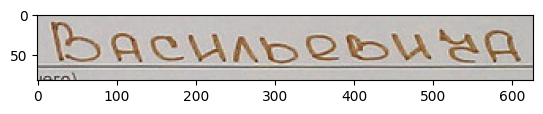

In [17]:
import torch
test_img = torch.from_numpy(numpy_images[73829])
plt.imshow(test_img)

In [57]:
label_length = len(labels)

max_expression_length = max(labels, key=len)
len(max_expression_length)

counter_chars =  Counter(''.join(labels))
counter_chars = dict(counter_chars)
counter_chars = dict(sorted(counter_chars.items(), key = lambda i: i[1]))
counter_chars

{'x': 1,
 'y': 1,
 'R': 1,
 '=': 1,
 '[': 1,
 ']': 1,
 '+': 1,
 'p': 1,
 'b': 1,
 'o': 1,
 'e': 1,
 'r': 1,
 'Щ': 2,
 'c': 2,
 'i': 2,
 's': 2,
 '№': 3,
 'h': 3,
 't': 3,
 'u': 3,
 '«': 6,
 '»': 6,
 "'": 12,
 '%': 14,
 '?': 15,
 'Й': 19,
 '!': 29,
 '/': 57,
 'Я': 60,
 ';': 64,
 'Ж': 66,
 'Ц': 97,
 'Ш': 121,
 'Ю': 145,
 'Х': 147,
 'Ч': 182,
 'Э': 218,
 'Ф': 283,
 'Л': 303,
 '4': 351,
 '(': 355,
 ':': 368,
 'ъ': 376,
 '8': 381,
 'З': 385,
 'Г': 393,
 '6': 395,
 'Б': 400,
 '7': 409,
 'У': 412,
 '5': 458,
 '"': 462,
 ')': 549,
 '9': 572,
 '3': 589,
 'Т': 590,
 'А': 597,
 'Н': 597,
 'Е': 627,
 'ё': 628,
 'И': 631,
 'М': 682,
 'Д': 695,
 'Р': 736,
 'К': 812,
 'О': 942,
 'С': 1178,
 'В': 1186,
 '2': 1198,
 'э': 1356,
 '0': 1528,
 'П': 1614,
 '1': 1657,
 'ф': 1666,
 '-': 2117,
 'щ': 2120,
 'ш': 2375,
 ',': 2831,
 'ю': 2957,
 'ц': 3118,
 'х': 4429,
 'ж': 4661,
 '.': 6007,
 'й': 6660,
 'б': 7518,
 'ч': 7883,
 'з': 8057,
 'г': 8103,
 'ь': 8761,
 ' ': 8827,
 'ы': 9538,
 'у': 11178,
 'я': 11660,
 '

<BarContainer object of 107 artists>

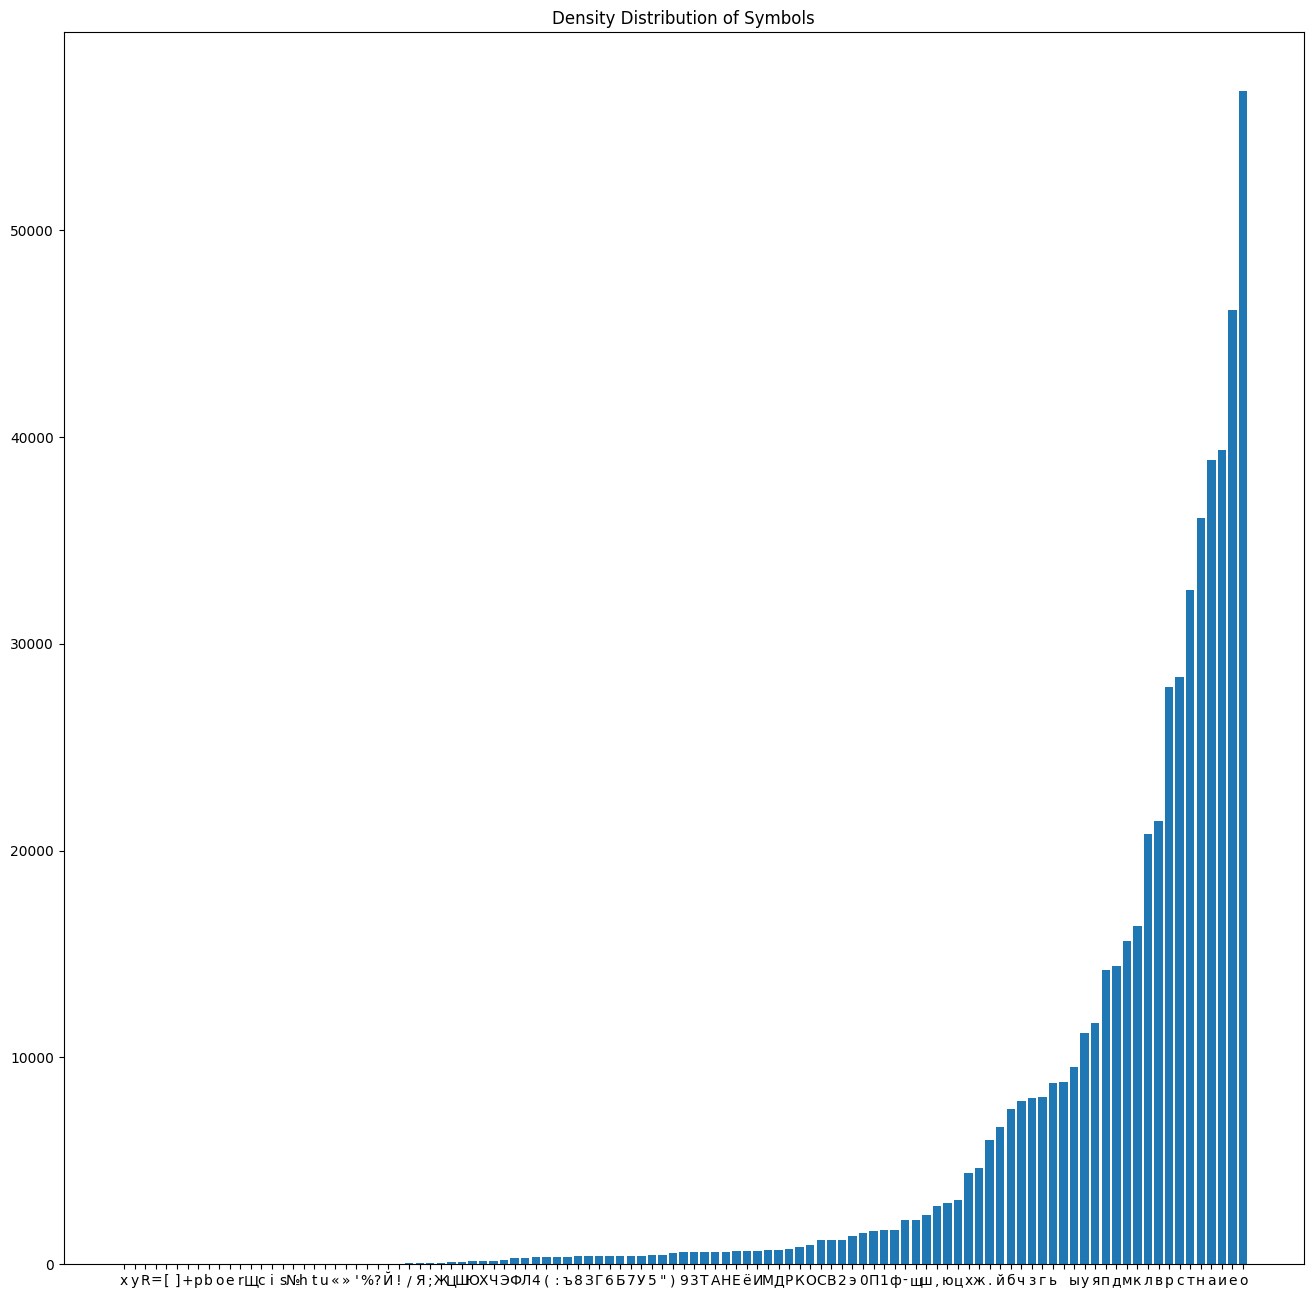

In [58]:
plt.figure(figsize=(16, 16))
plt.title('Density Distribution of Symbols')
plt.bar(counter_chars.keys(), [counter_chars[key] for key in counter_chars.keys()])